<a href="https://colab.research.google.com/github/babyhandzzz/2015lab4/blob/master/FRM_CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capital Market Line (CML)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate random returns for 5 stocks
num_stocks = 5
num_points = 252  # Number of trading days in a year
returns = np.random.normal(0.001, 0.02, (num_points, num_stocks))  # Mean daily return of 0.1% and std of 2%


In [ ]:
returns

array([[ 0.01093428, -0.00176529,  0.01395377,  0.0314606 , -0.00368307],
       [-0.00368274,  0.03258426,  0.01634869, -0.00838949,  0.0118512 ],
       [-0.00826835, -0.0083146 ,  0.00583925, -0.0372656 , -0.03349836],
       ...,
       [-0.02347881,  0.00168167, -0.01439946,  0.00567572, -0.03011791],
       [ 0.0076176 ,  0.01767058, -0.03887471,  0.00848113,  0.02555338],
       [-0.02319282,  0.03445145,  0.00938038, -0.01310024, -0.00011538]])

In [ ]:

# Calculate expected returns and covariance matrix
expected_returns = np.mean(returns, axis=0)
cov_matrix = np.cov(returns, rowvar=False)



In [ ]:
expected_returns

array([0.00128986, 0.00037904, 0.00099573, 0.00268777, 0.00345948])

In [ ]:
print(cov_matrix.shape)
cov_matrix

(5, 5)


array([[ 3.50768802e-04, -2.24286350e-05,  3.26431802e-05,
         4.30511200e-07,  9.49326247e-06],
       [-2.24286350e-05,  4.31211746e-04,  2.85773813e-06,
        -1.08078997e-05,  3.02963614e-05],
       [ 3.26431802e-05,  2.85773813e-06,  3.74957883e-04,
        -3.78408451e-06,  3.34781970e-05],
       [ 4.30511200e-07, -1.08078997e-05, -3.78408451e-06,
         3.77260407e-04, -2.19327390e-05],
       [ 9.49326247e-06,  3.02963614e-05,  3.34781970e-05,
        -2.19327390e-05,  4.23805072e-04]])

In [ ]:
# Risk-free rate
risk_free_rate = 0.01

# Generate portfolios
num_portfolios = 5000
portfolio_weights = np.random.dirichlet(np.ones(num_stocks), size=num_portfolios)


In [ ]:
portfolio_weights

array([[0.14818214, 0.56696418, 0.03456791, 0.21005537, 0.04023041],
       [0.23215377, 0.03075457, 0.18103823, 0.42687791, 0.12917552],
       [0.17991389, 0.26113329, 0.43108045, 0.04400291, 0.08386946],
       ...,
       [0.05460462, 0.12529138, 0.34649658, 0.45943132, 0.0141761 ],
       [0.20924011, 0.23027344, 0.02269439, 0.19196311, 0.34582895],
       [0.0124904 , 0.32615048, 0.19616724, 0.40901989, 0.05617199]])

In [ ]:
portfolio_returns = portfolio_weights.dot(expected_returns)

portfolio_returns


array([0.00114421, 0.0020856 , 0.0011687 , ..., 0.00174683, 0.00209211,
       0.00162874])

In [ ]:
portfolio_risks = np.sqrt(np.diag(portfolio_weights.dot(cov_matrix).dot(portfolio_weights.T)))

portfolio_risks.shape


(5000,)

In [ ]:
portfolio_sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks



In [ ]:
portfolio_sharpe_ratios

array([-0.70145567, -0.75789206, -0.80206591, ..., -0.7198119 ,
       -0.77527942, -0.75630314])

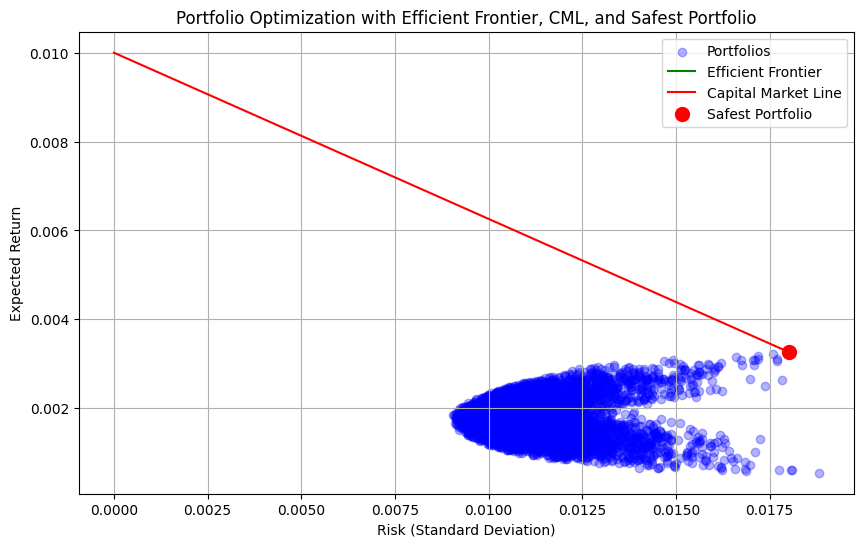

In [ ]:


# Efficient Frontier: Filter portfolios that have the minimum risk for a given level of return
sorted_indices = np.argsort(portfolio_risks)
sorted_risks = portfolio_risks[sorted_indices]
sorted_returns = portfolio_returns[sorted_indices]
efficient_mask = np.empty_like(sorted_risks, dtype=bool)
efficient_mask[0] = True
for i in range(1, len(sorted_risks)):
    efficient_mask[i] = sorted_returns[i] > sorted_returns[efficient_mask].max()

# Calculate the Capital Market Line
max_sharpe_idx = np.argmax(portfolio_sharpe_ratios)
safest_portfolio_risk = portfolio_risks[max_sharpe_idx]
safest_portfolio_return = portfolio_returns[max_sharpe_idx]
cml_x = np.linspace(0, safest_portfolio_risk, 500)
cml_slope = (safest_portfolio_return - risk_free_rate) / safest_portfolio_risk
cml_y = risk_free_rate + cml_slope * cml_x

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risks, portfolio_returns, c='blue', label='Portfolios', alpha=0.3)
plt.plot(sorted_risks[efficient_mask], sorted_returns[efficient_mask], 'g-', label='Efficient Frontier')
plt.plot(cml_x, cml_y, 'r-', label='Capital Market Line')
plt.scatter(safest_portfolio_risk, safest_portfolio_return, c='red', s=100, label='Safest Portfolio')
plt.title('Portfolio Optimization with Efficient Frontier, CML, and Safest Portfolio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()